In [165]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

In [166]:
posts = pd.read_csv("../data/posts.csv", index_col="id")

In [179]:
posts.sample(5)

,author,full_link,num_comments,title,gilded,score,selftext,total_awards_received,age,gender,average_rating
id,,,,,,,,,,,
d6thrz,Monte01,https://www.reddit.com/r/Rateme/comments/d6thr...,2,Honesty appreciated!,NaN,1,NaN,0.0,NaN,NaN,NaN
80sajb,Serenadeus,https://www.reddit.com/r/Rateme/comments/80saj...,1,Rate me and how do you think I am?,NaN,1,NaN,NaN,NaN,NaN,NaN
as4sdx,JxmesHill,https://www.reddit.com/r/Rateme/comments/as4sd...,1,"[M19] , be honest",NaN,1,NaN,NaN,19.0,M,NaN
8kwn38,Nakioyh,https://www.reddit.com/r/Rateme/comments/8kwn3...,1,"havent had much success dating, be as honest a...",0.0,1,NaN,NaN,NaN,NaN,NaN
cpvw89,Minesa21,https://www.reddit.com/r/Rateme/comments/cpvw8...,3,23F i would appreciate an honnest rating ( i a...,NaN,1,NaN,0.0,23.0,F,NaN


In [167]:
posts.head()

,author,full_link,num_comments,title,gilded,score,selftext,total_awards_received,age,gender,average_rating
id,,,,,,,,,,,
dh3ha2,Thisiskindacoolig,https://www.reddit.com/r/Rateme/comments/dh3ha...,2,Hows my smile?,NaN,1,NaN,0.0,NaN,NaN,NaN
dh3b61,Hamzokxx,https://www.reddit.com/r/Rateme/comments/dh3b6...,1,[20M] What do you think of the Arabic /Russian...,NaN,1,NaN,0.0,20.0,M,NaN
dh37sw,Hanerbernerner,https://www.reddit.com/r/Rateme/comments/dh37s...,2,Kinda low self esteem. Honest feedback please....,NaN,1,NaN,0.0,NaN,NaN,NaN
dh368y,ratemethrowaway567,https://www.reddit.com/r/Rateme/comments/dh368...,18,[25 F] Got a haircut today. Some are with make...,NaN,1,NaN,0.0,25.0,F,5.333333
dh32ch,kcalderero,https://www.reddit.com/r/Rateme/comments/dh32c...,1,#RateMe,NaN,1,[removed],0.0,NaN,NaN,NaN


In [168]:
gt5 = posts[posts.num_comments > 5]

In [42]:
posts.gender = posts.gender.str.upper()

# Age Distribution

Very much exponential distribution. You can see when we plot log scale, the range from 20 to 60 is pretty much linearly decreasing.

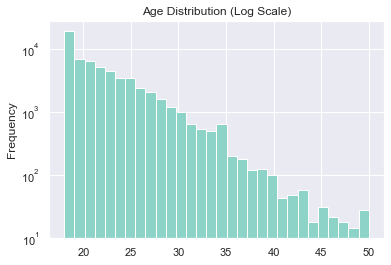

In [97]:
age_gender_posts = posts.dropna(subset=["age", "gender"])
age_gender_posts = age_gender_posts[age_gender_posts.age <= 50]
age_gender_posts["age"].plot.hist(bins=30, title="Age Distribution (Log Scale)", log=True)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


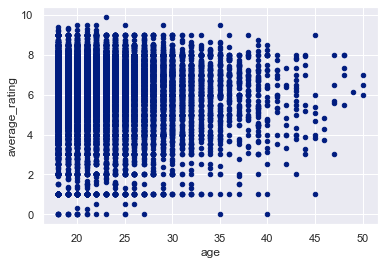

In [98]:
age_gender_posts.plot.scatter(x="age", y="average_rating")

Text(0.5, 1.0, 'Average Rating by Age')

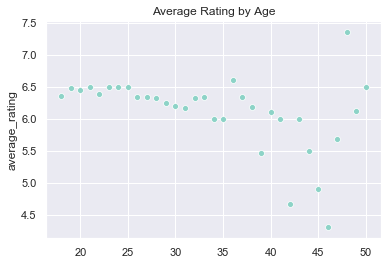

In [99]:
sns.scatterplot(list(age_gender_posts.groupby("age").indices.keys()),
                age_gender_posts.groupby("age").average_rating.agg("median")
               ).set_title("Average Rating by Age")

# Rating Distribution

In [56]:
rating_posts = posts.dropna(subset=["average_rating"])

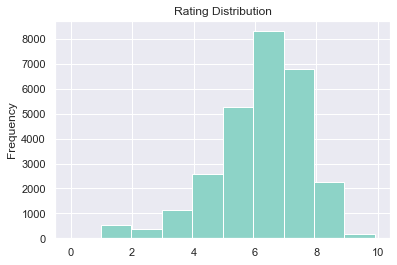

In [59]:
rating_posts.average_rating.plot.hist(title="Rating Distribution")

Text(0, 0.5, 'Frequency')

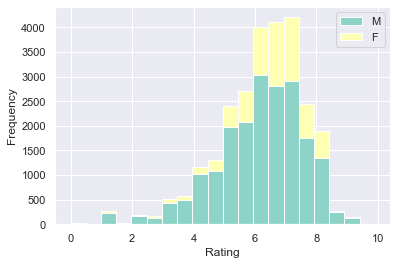

In [204]:
genders = rating_posts.groupby("gender")
fig, ax = plt.subplots()
ax.hist([genders.get_group("M").average_rating, genders.get_group("F").average_rating],
         stacked=True,
         bins=20, label=["M", "F"])
ax.legend()
ax.set_xlabel("Rating")
ax.set_ylabel("Frequency")

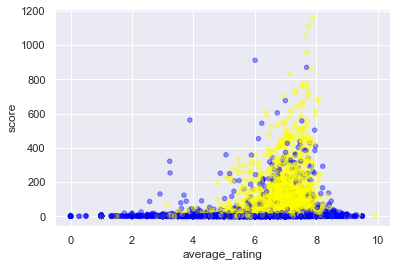

In [181]:
colors = {"M": "blue", "F": "yellow"}
rating_posts.plot.scatter(x="average_rating",
                          y="score",
                          color=[colors[m] if m in colors else "black" for m in rating_posts.gender],
                          alpha=0.4)

The arc of high scoring / low rating corresponds to progress p

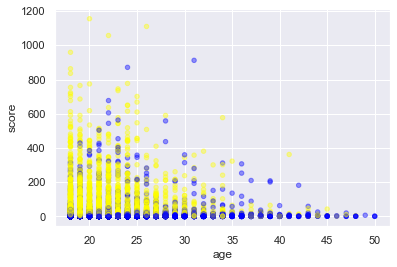

In [160]:
rating_posts = rating_posts[rating_posts.age <= 50]
rating_posts.plot.scatter(x="age",
                          y="score",
                          color=[colors[m] if m in colors else "black" for m in rating_posts.gender],
                          alpha=0.4)

Roughly, higher-scoring males tend to be older than higher-scoring females.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


gender
F    AxesSubplot(0.125,0.125;0.775x0.755)
M    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

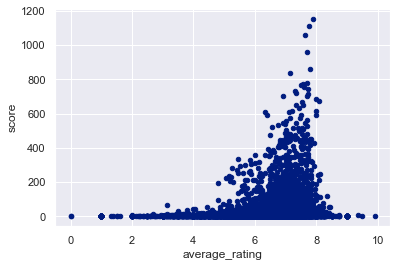

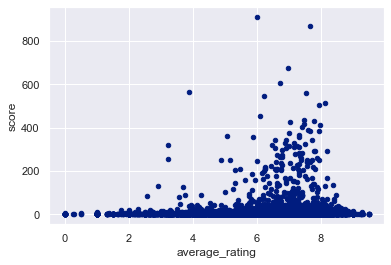

In [137]:
rating_posts.groupby("gender").plot.scatter(x="average_rating", y="score")

In [ ]:
rating_posts..plot.scatter(x="average_rating", y="score")

In [139]:
rating_posts.groupby("gender").average_rating.describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,6569.0,6.463805,1.214074,0.0,5.898718,6.676923,7.275862,9.9
M,19876.0,6.074925,1.474308,0.0,5.250000,6.250000,7.055952,9.5


In [140]:
rating_posts.groupby("gender").score.describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,6569.0,34.517126,85.868165,0.0,1.0,7.0,24.0,1155.0
M,19876.0,4.912105,24.786295,0.0,1.0,1.0,3.0,912.0


gender
F    AxesSubplot(0.125,0.125;0.775x0.755)
M    AxesSubplot(0.125,0.125;0.775x0.755)
Name: score, dtype: object

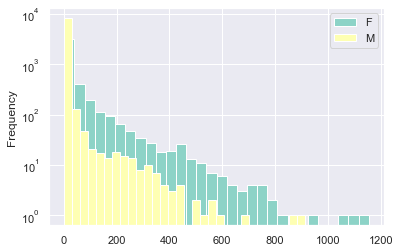

In [158]:
rating_posts[rating_posts.score > 1].groupby("gender")["score"].plot.hist(bins=30, log=True, legend=True)

In [118]:
import webbrowser

webbrowser.open(rating_posts.loc[42604].full_link)

True

In [111]:
comments = pd.read_csv("../data/comments.csv")

/Users/naitian/Documents/Projects/MDST/rateme/env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [115]:
comments.loc[159440].body

'Speaking objectively: 9.5/10 :) \n\nSpeaking as a fan of nose rings: 10/10 :)'

In [147]:
posts[(posts.average_rating < 5) &(posts.score > 600)].iloc[0]

id                                                                  bxu93p
author                                                             HY4ever
full_link                https://www.reddit.com/r/Rateme/comments/bxu93...
num_comments                                                           125
title                    Im a 25 year old 4' 10" mom who recently lost ...
gilded                                                                 NaN
score                                                                  734
selftext                                                               NaN
total_awards_received                                                    0
age                                                                    NaN
gender                                                                 NaN
average_rating                                                     4.30165
Name: 18131, dtype: object